In [1]:
#This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-strategy-personalised-offer/sample.csv
/kaggle/input/marketing-strategy-personalised-offer/train_data.csv
/kaggle/input/marketing-strategy-personalised-offer/test_data.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
data_1 = pd.read_csv("/kaggle/input/marketing-strategy-personalised-offer/train_data.csv")
data_2 = pd.read_csv("/kaggle/input/marketing-strategy-personalised-offer/test_data.csv")

In [4]:
# data_1 = pd.read_csv("train_data 2.csv")
# data_2 = pd.read_csv("test_data.csv")

In [5]:
data = data_1.copy()
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

x_testing = data_2

In [6]:
data.head(5)

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,2days,₹100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,...,0,0,4,67,less1,22,Spring,Location B,0,No
1,2days,₹87500 - ₹99999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,...,0,1,3,89,1~3,18,Summer,Location B,0,Yes
2,2days,₹87500 - ₹99999,less1,1,1~3,Single,Cold drinks,26,1,0,...,1,1,4,67,less1,7,Winter,Location A,1,Yes
3,10hours,₹37500 - ₹49999,less1,0,1~3,Single,Take-away restaurant,46,1,0,...,0,1,3,89,1~3,7,Summer,Location C,0,No
4,2days,₹100000 or More,never,1,1~3,Single,4 star restaurant,21,0,1,...,1,0,3,40,less1,7,Summer,Location C,0,No


In [7]:
data.columns.shape

(31,)

In [8]:
data.shape

(12379, 31)

In [9]:
data.columns

Index(['offer expiration', 'income_range', 'no_visited_Cold drinks',
       'travelled_more_than_15mins_for_offer', 'Restaur_spend_less_than20',
       'Marital Status', 'restaurant type', 'age',
       'Prefer western over chinese', 'travelled_more_than_25mins_for_offer',
       'travelled_more_than_5mins_for_offer', 'no_visited_bars', 'gender',
       'car', 'restuarant_same_direction_house', 'Cooks regularly',
       'Customer type', 'Qualification', 'is foodie', 'no_Take-aways',
       'Job/Job Industry', 'restuarant_opposite_direction_house',
       'has Children', 'visit restaurant with rating (avg)', 'temperature',
       'Restaur_spend_greater_than20', 'Travel Time', 'Climate',
       'drop location', 'Prefer home food', 'Offer Accepted'],
      dtype='object')

#Data Transformation

In [10]:
data.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,2days,₹100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,...,0,0,4,67,less1,22,Spring,Location B,0,No
1,2days,₹87500 - ₹99999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,...,0,1,3,89,1~3,18,Summer,Location B,0,Yes
2,2days,₹87500 - ₹99999,less1,1,1~3,Single,Cold drinks,26,1,0,...,1,1,4,67,less1,7,Winter,Location A,1,Yes
3,10hours,₹37500 - ₹49999,less1,0,1~3,Single,Take-away restaurant,46,1,0,...,0,1,3,89,1~3,7,Summer,Location C,0,No
4,2days,₹100000 or More,never,1,1~3,Single,4 star restaurant,21,0,1,...,1,0,3,40,less1,7,Summer,Location C,0,No


In [11]:
from sklearn.preprocessing import LabelBinarizer
b = LabelBinarizer()
offer = b.fit_transform(data["Offer Accepted"])
y["Offer Accepted"] = offer
y = pd.DataFrame(y["Offer Accepted"], columns=["Offer Accepted"])
y

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Offer Accepted
0,0
1,1
2,1
3,0
4,0
...,...
12374,1
12375,1
12376,0
12377,1


In [12]:
x.drop(['car'], axis=1, inplace=True)
x_testing.drop(["car"], axis=1, inplace=True)

In [13]:
x.shape

(12379, 29)

In [14]:
def knn_func(data, colname):
    data[colname].replace('1~3', 0, inplace=True)
    data[colname].replace('gt8', 1, inplace=True)
    data[colname].replace('4~8', 2, inplace=True)
    data[colname].replace("less1", 3, inplace=True)
    data[colname].replace("never", 4, inplace=True)

    knn = KNNImputer(n_neighbors=1, missing_values=np.nan)
    cd = knn.fit_transform(data[colname].to_numpy().reshape(-1,1))
    
    data[colname] = cd.astype(int)

In [15]:
knn_func(x, "no_visited_Cold drinks")
knn_func(x, "Restaur_spend_greater_than20")
knn_func(x, "no_visited_bars")
knn_func(x, "no_Take-aways")
knn_func(x, "Restaur_spend_less_than20")

In [16]:
knn_func(x_testing, "no_visited_Cold drinks")
knn_func(x_testing, "Restaur_spend_greater_than20")
knn_func(x_testing, "no_visited_bars")
knn_func(x_testing, "no_Take-aways")
knn_func(x_testing, "Restaur_spend_less_than20")

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

ct1 = ColumnTransformer([
        ("scaler", StandardScaler(), ["no_visited_Cold drinks", "Restaur_spend_greater_than20", "no_visited_bars", "no_Take-aways", "Restaur_spend_less_than20"])
], remainder="passthrough")

In [18]:
one = ct1.fit_transform(x)
onedata = pd.DataFrame(one)

onetesting = ct1.fit_transform(x_testing)
onedatatesting = pd.DataFrame(onetesting)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

ct2 = ColumnTransformer([
        ("ordinal", OrdinalEncoder(), [0, 1, 5, 7, 16, 6, 12, 15, 19, 27, 26])
        
],remainder="passthrough")

In [20]:
# j = ct1.fit_transform(data)
# pd.DataFrame(j)

In [21]:
x["Prefer home food"]

0        0
1        0
2        1
3        0
4        0
        ..
12374    0
12375    0
12376    1
12377    0
12378    1
Name: Prefer home food, Length: 12379, dtype: int64

In [22]:
two = ct2.fit_transform(x)
twodata = pd.DataFrame(two)

twotesting = ct2.fit_transform(x_testing)
twodatatesting = pd.DataFrame(twotesting)

In [23]:
twodata.shape

(12379, 29)

In [24]:
# ct3 = ColumnTransformer([
#     ("standardscaler", StandardScaler(), [1, 2, 4, 7, 22, 23, 24, 25, 11])
# ])

# test_data = ct3.fit_transform(x_test_data)
# sparse1 = pd.DataFrame(ct3.fit_transform(x_test_data))
# x_test_data.drop(x_test_data.columns[[6, 12, 15, 19, 27, 28, 26]], inplace=True, axis=1)
# x_test_data = pd.concat([x_test_data, sparse1], axis=1)

In [25]:
# x = pd.concat([onedata, twodata], axis=1)

# Graphs

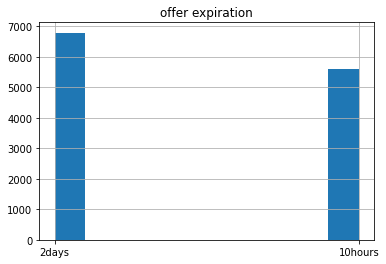

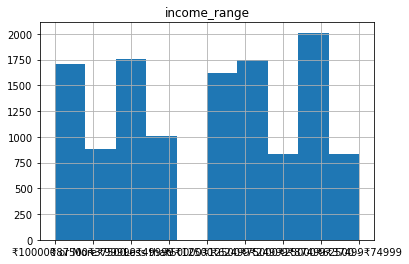

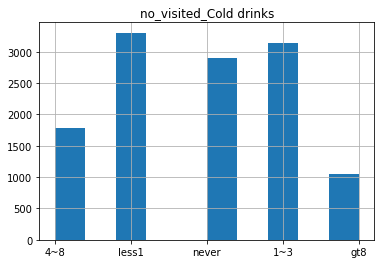

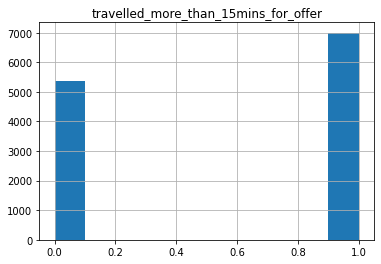

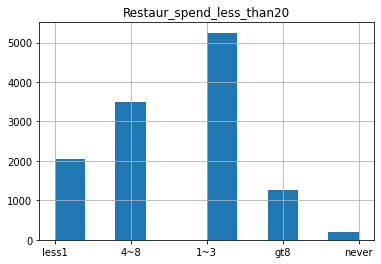

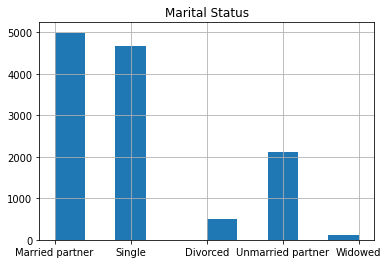

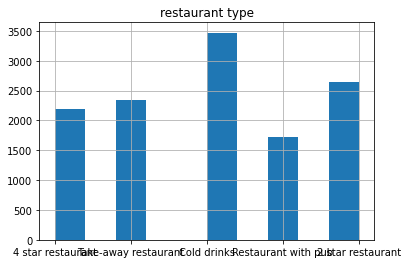

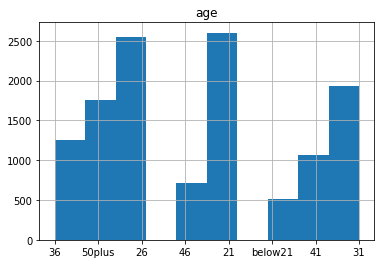

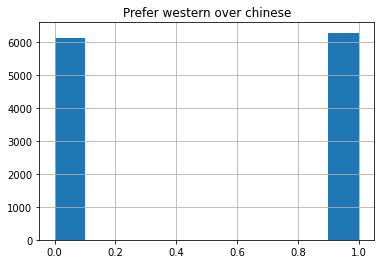

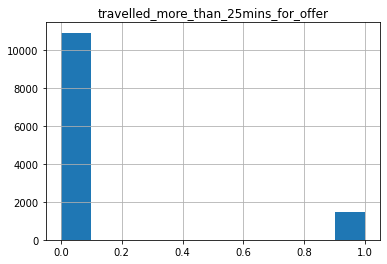

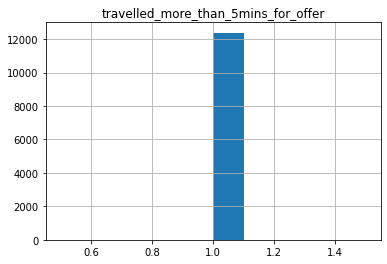

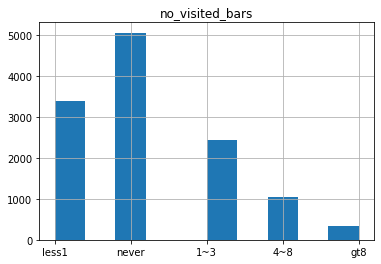

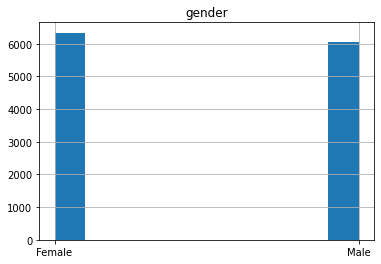

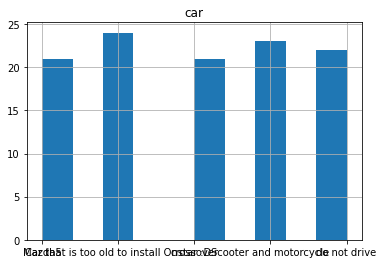

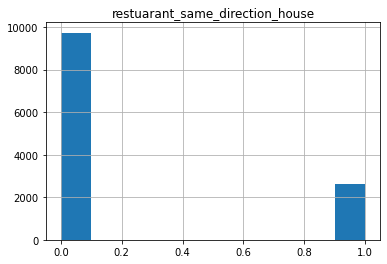

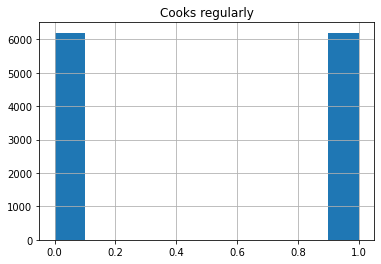

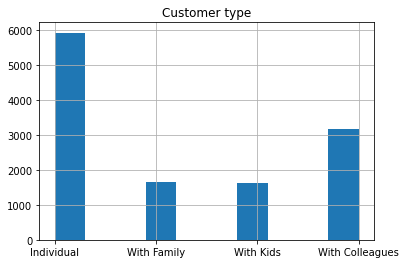

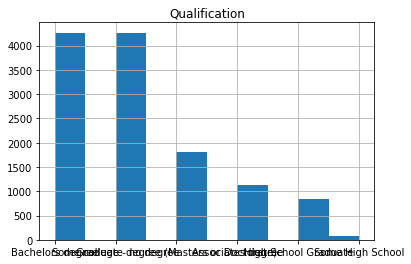

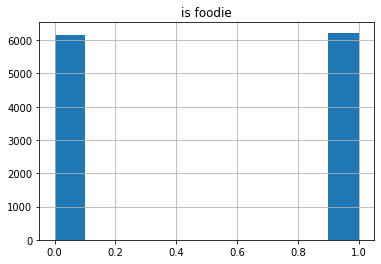

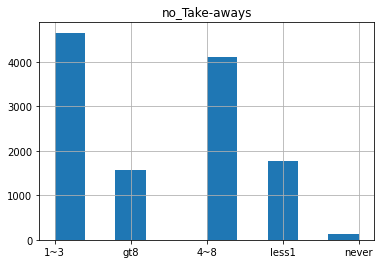

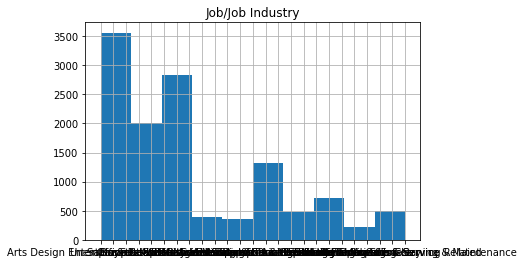

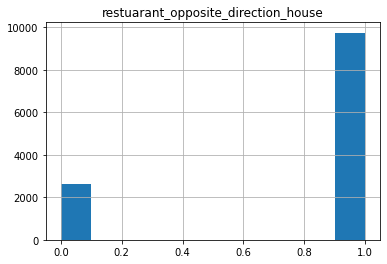

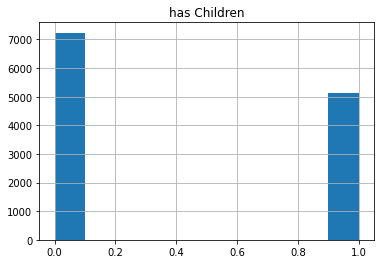

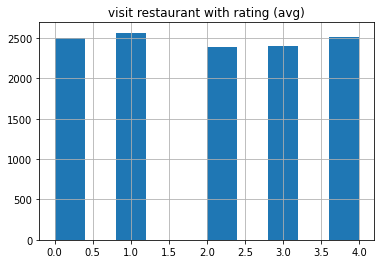

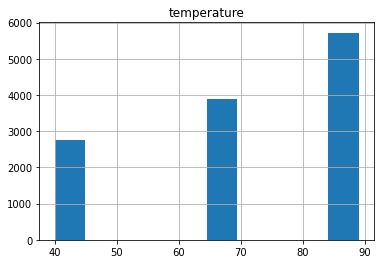

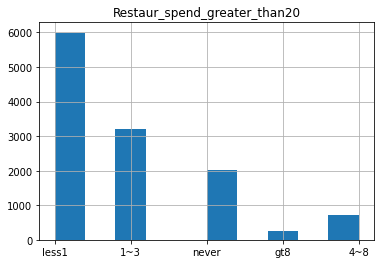

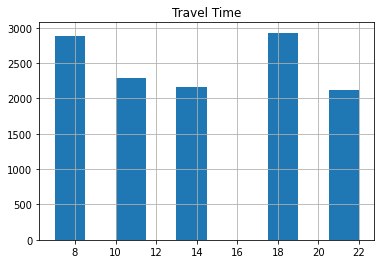

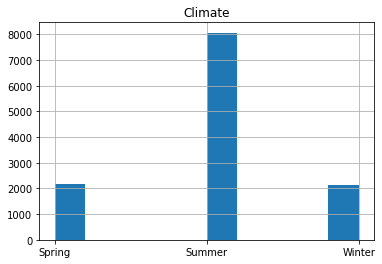

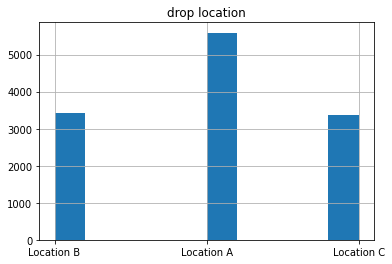

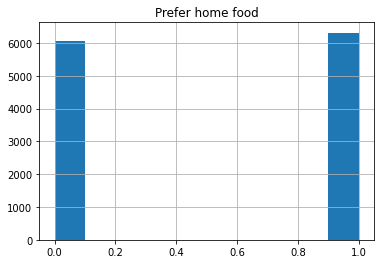

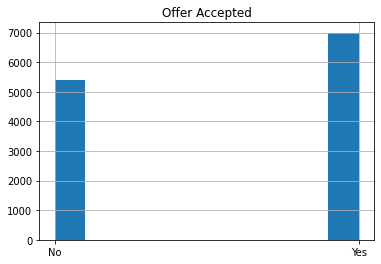

In [26]:
# data.iloc[:, 5].hist()
# plt.show()
#normal: standardscaler
#uniform: MinMax/ MinAbsoluteScaler
#no difference between label & one hot encoding 
for i in data.columns:
    data.loc[:, i].hist()
    plt.title(i)
    plt.show()

## Predictions

# RandomForestClassifier

In [27]:
x.shape, y.shape

((12379, 29), (12379, 1))

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(twodata, y, test_size=0.2, stratify=y)

In [29]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
5299,0.0,4.0,2.0,1.0,5.0,2.0,1.0,1.0,16.0,0.0,...,0.0,1.0,2.0,1.0,0.0,1.0,89.0,3.0,10.0,1.0
8417,0.0,8.0,3.0,4.0,5.0,3.0,0.0,1.0,22.0,0.0,...,1.0,1.0,3.0,0.0,1.0,0.0,67.0,4.0,7.0,1.0
4066,0.0,2.0,3.0,0.0,1.0,4.0,1.0,3.0,15.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,89.0,3.0,10.0,0.0
6854,0.0,5.0,2.0,0.0,5.0,2.0,0.0,0.0,22.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,89.0,3.0,10.0,0.0
5956,0.0,1.0,1.0,4.0,5.0,1.0,0.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,89.0,3.0,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5749,0.0,3.0,2.0,1.0,5.0,0.0,0.0,1.0,7.0,0.0,...,0.0,1.0,3.0,1.0,0.0,1.0,40.0,3.0,18.0,0.0
362,0.0,2.0,3.0,3.0,5.0,2.0,0.0,1.0,5.0,0.0,...,1.0,1.0,3.0,1.0,1.0,2.0,40.0,2.0,7.0,0.0
2321,1.0,5.0,1.0,6.0,1.0,3.0,0.0,0.0,20.0,1.0,...,1.0,1.0,2.0,1.0,1.0,4.0,67.0,3.0,18.0,1.0
5909,1.0,4.0,2.0,5.0,1.0,1.0,0.0,0.0,1.0,2.0,...,1.0,0.0,3.0,1.0,0.0,1.0,89.0,4.0,18.0,0.0


In [30]:
rf = RandomForestClassifier(n_estimators=900, max_depth=None, class_weight="balanced", min_samples_split=10)
rf.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(class_weight='balanced', min_samples_split=10,
                       n_estimators=900)

In [31]:
x_train.shape

(9903, 29)

In [32]:
x_test.shape

(2476, 29)

In [33]:
from sklearn.metrics import classification_report
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.47      0.52      1077
           1       0.65      0.74      0.69      1399

    accuracy                           0.62      2476
   macro avg       0.61      0.61      0.61      2476
weighted avg       0.62      0.62      0.62      2476



In [34]:
y_pred1 = rf.predict(x_train)
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4308
           1       0.99      0.99      0.99      5595

    accuracy                           0.99      9903
   macro avg       0.99      0.99      0.99      9903
weighted avg       0.99      0.99      0.99      9903



## RandomizedSearchCV

In [35]:
# from sklearn.model_selection import RandomizedSearchCV
# params = {n_estimators:range}

##Predict Test Data

In [36]:
y_testing = rf.predict(twodatatesting)
# y_testing = pd.DataFrame(y_testing)

In [37]:
def submission(label):
  f = open(f'/kaggle/working/submission.csv', "w")
  #f = open(f'/kaggle/submission.csv', "w")
 #f = open(f'/kaggle/output/marketing-strategy-personalised-offer/submissions.csv', "w")
  f.write('id' + ',' + 'Offer Accepted\n')
  for i in range(len(label)):
    if (label[i] == 0):
      f.write(str(i) + ',' + 'No\n')
    else:
      f.write(str(i) + ',' + 'Yes\n')
  f.close()

In [38]:
# y_testing.replace(1, "Yes", inplace=True)
# y_testing.replace(0, "No", inplace=True)
#y_testing.to_csv("submission.csv", columns=["OfferAccepted"])
submission(y_testing)

In [39]:
y_testing

array([0, 1, 0, ..., 0, 0, 1])